# download files from a url

### Normalizing continous numerical values

In [155]:
import pandas as pd              # fro reading in data
import matplotlib.pyplot as plt  # for visualizations
import numpy as np               # for statistical calculations
import seaborn as sns


In [156]:
# loading the data into a data frame 

dataset_url = "https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-mat.csv"
student_mat_df = pd.read_csv(dataset_url, ";")
student_mat_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [157]:
# encoding the string variables
# some models are unable to deal with string values or do not perform well with them
# Hence the string values require encoding

# Binary values are encoded to a 1 or 0, e.g, Yes/No, Male/Female
student_mat_df["school"] = np.where(student_mat_df["school"].str.contains("GP", "MS"),1, 0)
student_mat_df["sex"] = np.where(student_mat_df["sex"].str.contains("M", "F"), 1, 0)
student_mat_df["address"] = np.where(student_mat_df["address"].str.contains("U", "R"), 1, 0)
student_mat_df["famsize"] = np.where(student_mat_df["famsize"].str.contains("LE3", "GT"), 1, 0)
student_mat_df["Pstatus"] = np.where(student_mat_df["Pstatus"].str.contains("T", "A"), 1, 0)
student_mat_df["schoolsup"] = np.where(student_mat_df["schoolsup"].str.contains("yes", "no"), 1, 0)
student_mat_df["famsup"] = np.where(student_mat_df["famsup"].str.contains("yes", "no"), 1, 0)
student_mat_df["paid"] = np.where(student_mat_df["paid"].str.contains("yes", "no"), 1, 0)
student_mat_df["activities"] = np.where(student_mat_df["activities"].str.contains("yes", "no"), 1, 0)
student_mat_df["nursery"] = np.where(student_mat_df["nursery"].str.contains("yes", "no"), 1, 0)
student_mat_df["higher"] = np.where(student_mat_df["higher"].str.contains("yes", "no"), 1, 0)
student_mat_df["internet"] = np.where(student_mat_df["internet"].str.contains("yes", "no"), 1, 0)
student_mat_df["romantic"] = np.where(student_mat_df["romantic"].str.contains("yes", "no"), 1, 0)



In [158]:
# Here, dictionary has been used to replace the string values 
# as a form of encoding the categorical data

labels = student_mat_df['Mjob'].astype('category').cat.categories.tolist()
replace_map_comp = {'Mjob' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_mat_df.replace(replace_map_comp, inplace=True)

labels = student_mat_df['Fjob'].astype('category').cat.categories.tolist()
replace_map_comp = {'Fjob' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_mat_df.replace(replace_map_comp, inplace=True)

labels = student_mat_df['guardian'].astype('category').cat.categories.tolist()
replace_map_comp = {'guardian' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_mat_df.replace(replace_map_comp, inplace=True)

labels = student_mat_df['reason'].astype('category').cat.categories.tolist()
replace_map_comp = {'reason' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_mat_df.replace(replace_map_comp, inplace=True)

student_mat_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,18,1,0,0,4,4,1,5,...,4,3,4,1,1,3,6,5,6,6
1,1,0,17,1,0,1,1,1,1,3,...,5,3,3,1,1,3,4,5,5,6
2,1,0,15,1,1,1,1,1,1,3,...,4,3,2,2,3,3,10,7,8,10
3,1,0,15,1,0,1,4,2,2,4,...,3,2,2,1,1,5,2,15,14,15
4,1,0,16,1,0,1,3,3,3,3,...,4,3,2,1,2,5,4,6,10,10


In [159]:
from numpy import interp

grades = ['G1','G2','G3']
xyz = student_mat_df[grades].copy()
student_mat_df[grades] = interp(student_mat_df[grades],[0, 20],[1, 5]).round(0)   # since the resulting variables are float,

student_mat_df[grades].astype(int)


# we first define all features as the type 'category'
student_mat_df.iloc[:, 0:33] =(student_mat_df.iloc[:, 0:33]).astype('category')

# Defining the numerial data types by overwriting their initial 'category' type
student_mat_df[["age", "absences"]] = student_mat_df[["age", "absences"]].astype('int')


xyz.head()


,G1,G2,G3
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10


In [160]:
student_mat_df[grades].head()

,G1,G2,G3
0,2.0,2.0,2.0
1,2.0,2.0,2.0
2,2.0,3.0,3.0
3,4.0,4.0,4.0
4,2.0,3.0,3.0


In [161]:
# We first divide our data into attributes and labels:

X = student_mat_df.iloc[:, 0:-2 ].values  # Independent/predictor variables
y = student_mat_df.iloc[:, -1].values    # Dependent/label variable


Initially, the target output (G3) class ranges from 0 to 20, making up 21 clusters. This is an unreasonable setting for the classification task, because it makes it
extremely difficult to classify—remember that the number of instances we have is only 395.
As a result, I have mapped a group of clusters to a few clusters [1,4],

In [162]:
student_mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    int32   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   Pstatus     395 non-null    category
 6   Medu        395 non-null    category
 7   Fedu        395 non-null    category
 8   Mjob        395 non-null    category
 9   Fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    category
 13  studytime   395 non-null    category
 14  failures    395 non-null    category
 15  schoolsup   395 non-null    category
 16  famsup      395 non-null    category
 17  paid        395 non-null    category
 18  activities  395 non-null    category
 19  nursery 

## Prinipal Component Analysis

PCA is a fast and flexible unsupervised method for dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering. Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.PCA's main weakness is that it tends to be highly affected by outliers in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components. 

Reference:
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

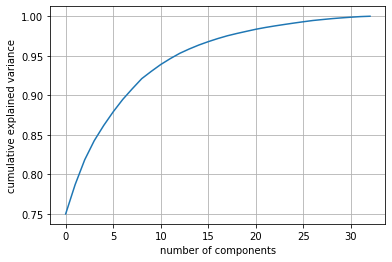

In [163]:
from sklearn.decomposition import PCA
pca = PCA().fit(student_mat_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(axis='both')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 33-dimensional variance is contained within the first N components. With the students data set the first 5 components contain approximately 90% of the variance, while you need around 30 components to describe close to 100% of the variance.

In [164]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier     # Decision Tree Classifier
from sklearn import svm                             # SVM Classifier
from sklearn.naive_bayes import GaussianNB          # Naive Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from xgboost import XGBClassifier  



In [165]:
# define the pipeline
steps = [('pca', PCA(n_components=6)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.542 (0.032)


In [166]:
# define the pipeline
steps = [('pca', PCA(n_components=6)), ('m', DecisionTreeClassifier())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.424 (0.052)


In [167]:
# define the pipeline
steps = [('pca', PCA(n_components=6)), ('m', GaussianNB())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.469 (0.045)


In [168]:
# define the pipeline
steps = [('pca', PCA(n_components=6)), ('m', KNeighborsClassifier())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.484 (0.046)


In [169]:
# define the pipeline
steps = [('pca', PCA(n_components=6)), ('m', RandomForestClassifier())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.538 (0.031)


In [170]:
# define the pipeline
steps = [('pca', PCA(n_components=6)), ('m', XGBClassifier())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.509 (0.042)


Components 	 Accuracy 	 Std dev
>1 		 0.480 		 (0.036)
>2 		 0.539 		 (0.054)
>3 		 0.555 		 (0.053)
>4 		 0.547 		 (0.056)
>5 		 0.526 		 (0.061)
>6 		 0.541 		 (0.061)
>7 		 0.528 		 (0.057)
>8 		 0.522 		 (0.066)
>9 		 0.538 		 (0.068)
>10 		 0.544 		 (0.067)
>11 		 0.560 		 (0.074)
>12 		 0.577 		 (0.077)
>13 		 0.677 		 (0.071)
>14 		 0.683 		 (0.078)
>15 		 0.666 		 (0.081)
>16 		 0.670 		 (0.085)
>17 		 0.673 		 (0.086)
>18 		 0.673 		 (0.081)
>19 		 0.675 		 (0.077)
>20 		 0.675 		 (0.078)
>21 		 0.676 		 (0.073)
>22 		 0.671 		 (0.067)
>23 		 0.674 		 (0.074)
>24 		 0.675 		 (0.075)
>25 		 0.684 		 (0.074)
>26 		 0.683 		 (0.075)
>27 		 0.678 		 (0.074)
>28 		 0.675 		 (0.083)
>29 		 0.675 		 (0.080)
>30 		 0.674 		 (0.086)
>31 		 0.683 		 (0.084)


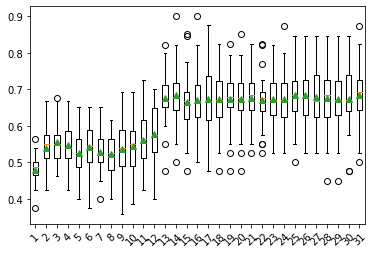

In [171]:
# compare pca number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,32):
		steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
		models[str(i)] = Pipeline(steps=steps)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
#X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
cnt = 0
accdata = []
for name, model in models.items():
    cnt+=1
    if cnt==1:
        print('Components \t Accuracy \t Std dev')
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s \t\t %.3f \t\t (%.3f)' % (name, mean(scores), std(scores)))
    accdata.append([name,mean(scores),std(scores)])
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()



## Testing the best performing model on a similar dataset

The student performance dataset has two data sets, one that has scores for Mathematics and another that has scores for Portugese. Both have the exact same number of attributes and attribute labels but not the same number of observations. The one with Mathematics scores has 395 observations while the other has 649 observations. 

Since we have already tested and optimized our models, and came up with PCA as the best dimension reduction tool while using logistic regression to predict values, we're now going to try fitting the model with our new data set and see how it performs.

The new dataset undergoes the same transformations as the one used in training the models. Hence, encoding, factoring and scaling the dataset will still be necessary.

## Loading the dataset

In [172]:
student_por_url = "https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-por.csv"
student_por_df = pd.read_csv(student_por_url, ';')
student_por_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [173]:
# Check for null values

student_por_df.isnull().sum().sum()

0

## Encoding the string variables

In [174]:
# encoding the string variables
# some models are unable to deal with string values or do not perform well with them
# Hence the string values require encoding

# Binary values are encoded to a 1 or 0, e.g, Yes/No, Male/Female

student_por_df["school"] = np.where(student_por_df["school"].str.contains("GP", "MS"),1, 0)
student_por_df["sex"] = np.where(student_por_df["sex"].str.contains("M", "F"), 1, 0)
student_por_df["address"] = np.where(student_por_df["address"].str.contains("U", "R"), 1, 0)
student_por_df["famsize"] = np.where(student_por_df["famsize"].str.contains("LE3", "GT"), 1, 0)
student_por_df["Pstatus"] = np.where(student_por_df["Pstatus"].str.contains("T", "A"), 1, 0)
student_por_df["schoolsup"] = np.where(student_por_df["schoolsup"].str.contains("yes", "no"), 1, 0)
student_por_df["famsup"] = np.where(student_por_df["famsup"].str.contains("yes", "no"), 1, 0)
student_por_df["paid"] = np.where(student_por_df["paid"].str.contains("yes", "no"), 1, 0)
student_por_df["activities"] = np.where(student_por_df["activities"].str.contains("yes", "no"), 1, 0)
student_por_df["nursery"] = np.where(student_por_df["nursery"].str.contains("yes", "no"), 1, 0)
student_por_df["higher"] = np.where(student_por_df["higher"].str.contains("yes", "no"), 1, 0)
student_por_df["internet"] = np.where(student_por_df["internet"].str.contains("yes", "no"), 1, 0)
student_por_df["romantic"] = np.where(student_por_df["romantic"].str.contains("yes", "no"), 1, 0)



In [175]:
# Here, dictionary comprehension has been used to replace the string values 
# as a form of encoding the categorical data

labels = student_por_df['Mjob'].astype('category').cat.categories.tolist()
replace_map_comp = {'Mjob' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_por_df.replace(replace_map_comp, inplace=True)

labels = student_por_df['Fjob'].astype('category').cat.categories.tolist()
replace_map_comp = {'Fjob' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_por_df.replace(replace_map_comp, inplace=True)

labels = student_por_df['guardian'].astype('category').cat.categories.tolist()
replace_map_comp = {'guardian' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_por_df.replace(replace_map_comp, inplace=True)

labels = student_por_df['reason'].astype('category').cat.categories.tolist()
replace_map_comp = {'reason' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_por_df.replace(replace_map_comp, inplace=True)

# preview the encoded data
student_por_df[['Mjob', 'Fjob', 'reason', 'guardian']]

,Mjob,Fjob,reason,guardian
0,1,5,1,2
1,1,3,1,1
2,1,3,3,2
3,2,4,2,2
4,3,3,2,1
...,...,...,...,...
644,4,3,1,2
645,5,4,1,2
646,3,3,1,2
647,4,4,1,2


## Defining predictors and targets.

In [176]:
# We first divide our data into attributes and labels:

X2 = student_por_df.iloc[:, 0:-2].values # Independent/predictor variables
y2 = student_por_df['G3'].values         # Dependent/label variable

 Since we approached this as a classification problem, 
the label Variable 'G3' has too many classes (21) for each value from 0 to 21
this makes it difficult to classify given the number of instances is only 395
the provided solution reduces the classes father by mapping values to only 4 classes

## Defining type for variables

In [177]:

# we first define all features as the type 'category'
student_por_df.iloc[:, 0:33] =(student_por_df.iloc[:, 0:33]).astype('category')

# Defining the numerial data types by overwriting their initial 'category' type
student_por_df[["age", "absences"]] = student_por_df[["age", "absences"]].astype('int')


# confirm results
student_por_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      649 non-null    category
 1   sex         649 non-null    category
 2   age         649 non-null    int32   
 3   address     649 non-null    category
 4   famsize     649 non-null    category
 5   Pstatus     649 non-null    category
 6   Medu        649 non-null    category
 7   Fedu        649 non-null    category
 8   Mjob        649 non-null    category
 9   Fjob        649 non-null    category
 10  reason      649 non-null    category
 11  guardian    649 non-null    category
 12  traveltime  649 non-null    category
 13  studytime   649 non-null    category
 14  failures    649 non-null    category
 15  schoolsup   649 non-null    category
 16  famsup      649 non-null    category
 17  paid        649 non-null    category
 18  activities  649 non-null    category
 19  nursery 

## Scaling the data

Only the numeric variables will be scaled, the categorical variables are left out since they do not carry numeric weight but rather reperesent categories.

Components 	 Accuracy 	 Std dev


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>1 		 0.183 		 (0.039)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>2 		 0.312 		 (0.045)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>3 		 0.327 		 (0.046)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>4 		 0.328 		 (0.042)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>5 		 0.314 		 (0.039)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>6 		 0.330 		 (0.050)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>7 		 0.320 		 (0.051)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>8 		 0.311 		 (0.054)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>9 		 0.308 		 (0.057)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>10 		 0.295 		 (0.055)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>11 		 0.300 		 (0.048)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>12 		 0.300 		 (0.051)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>13 		 0.292 		 (0.058)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>14 		 0.291 		 (0.053)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>15 		 0.288 		 (0.047)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>16 		 0.296 		 (0.048)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>17 		 0.296 		 (0.050)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>18 		 0.301 		 (0.063)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>19 		 0.299 		 (0.058)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>20 		 0.297 		 (0.058)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>21 		 0.284 		 (0.064)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>22 		 0.282 		 (0.053)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>23 		 0.281 		 (0.052)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>24 		 0.280 		 (0.046)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>25 		 0.276 		 (0.046)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>26 		 0.276 		 (0.053)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>27 		 0.273 		 (0.051)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>28 		 0.270 		 (0.047)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>29 		 0.271 		 (0.050)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>30 		 0.271 		 (0.049)


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


>31 		 0.270 		 (0.047)


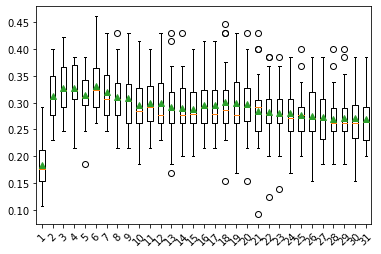

In [178]:
# compare pca number of components with logistic regression algorithm for classification

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,32):
		steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
		models[str(i)] = Pipeline(steps=steps)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X2, y2, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores


# get the models to evaluate
models = get_models()


# evaluate the models and store results
results, names = list(), list()
cnt = 0
accdata = []
for name, model in models.items():
    cnt+=1
    if cnt==1:
        print('Components \t Accuracy \t Std dev')
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s \t\t %.3f \t\t (%.3f)' % (name, mean(scores), std(scores)))
    accdata.append([name,mean(scores),std(scores)])
    
    
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()



The model does not achieve the same high accuracy it did (>80%) with other dataset.

In [179]:
b = {
    'a': [1,2,3,4,5,6,7,8,9,0],
    'b': [3,2,4,5,6,7,3,7,8,9],
    'c': [3,5,4,4,5,4,4,7,8,7],
    'd': [0,9,8,7,6,5,4,3,2,1]
}
b = pd.DataFrame.from_dict(b)
b.iloc[:, 0:3]

,a,b,c
0,1,3,3
1,2,2,5
2,3,4,4
3,4,5,4
4,5,6,5
5,6,7,4
6,7,3,4
7,8,7,7
8,9,8,8
9,0,9,7
